# Principal Component Analysis (PCA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
col_names = ["id","diagnosis", "radius_mean", "texture_mean", "perimeter_mean", 
"area_mean", "smoothness_mean", "compactness_mean", "concavity_mean",
"concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
"radius_se","texture_se", "perimeter_se", "area_se", "smoothness_se",
"compactness_se", "concavity_se", "concave_points_se", "symmetry_se",
"fractal_dimension_se", "radius_worst","texture_worst", "perimeter_worst",
"area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
"concave_points_worst", "symmetry_worst", "fractal_dimension_worst"]

PATH = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

df = pd.read_csv(PATH, header = None, names=col_names, index_col="id")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop(columns = 'diagnosis')
y = df['diagnosis']
X.shape

(569, 30)

In [6]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [7]:
pca = PCA()
pca.fit(scaled_df)

PCA()

In [8]:
pd.Series(pca.explained_variance_ratio_) 

0     0.442720
1     0.189712
2     0.093932
3     0.066021
4     0.054958
5     0.040245
6     0.022507
7     0.015887
8     0.013896
9     0.011690
10    0.009797
11    0.008705
12    0.008045
13    0.005234
14    0.003138
15    0.002662
16    0.001980
17    0.001754
18    0.001649
19    0.001039
20    0.000999
21    0.000915
22    0.000811
23    0.000602
24    0.000516
25    0.000273
26    0.000230
27    0.000053
28    0.000025
29    0.000004
dtype: float64

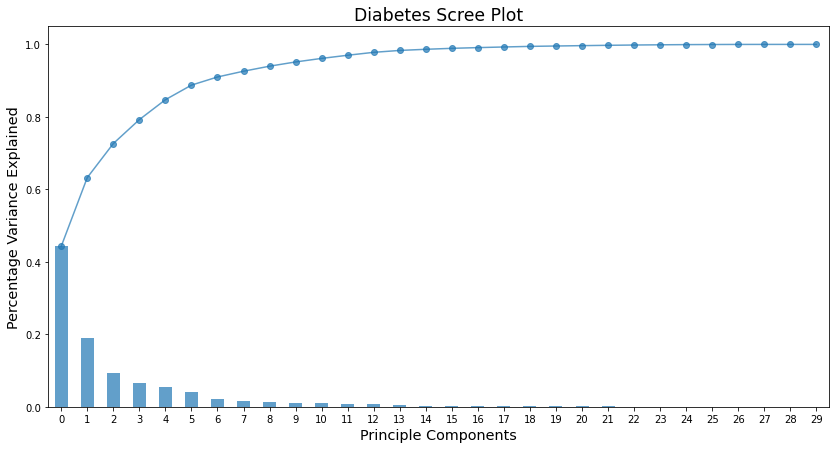

In [9]:
#plt.style.use("seaborn")
plt.figure(figsize=(14,7))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7)

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [11]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test) # to avoid Data Leakage

In [12]:
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [13]:
logreg_noPCA = LogisticRegression(max_iter=2085) # max_iter >> to allow the model reaches convergence
logreg = LogisticRegression()

In [14]:
%timeit logreg_noPCA.fit(X_train, y_train)
# millisecond = 1000 microseconds.

469 ms ± 18.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit logreg.fit(X_train_pca, y_train)

3.1 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
print('Training accuracy:', logreg.score(X_train_pca, y_train))
print('Testing accuracy:', logreg.score(X_test_pca, y_test))

Training accuracy: 0.960093896713615
Testing accuracy: 0.9440559440559441


## PCA with Pipelines

In [17]:
pipe = make_pipeline(StandardScaler(),
                     PCA(n_components=3),
                     LogisticRegression())

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9440559440559441

In [18]:
pred = pipe.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



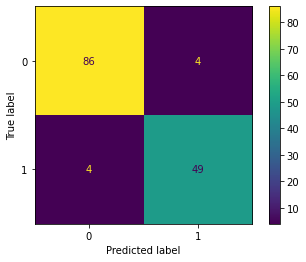

In [19]:
plot_confusion_matrix(pipe, X_test, y_test)
plt.grid(False);

## PCA with Pipelines and Grid Search

In [20]:
pipe2 = make_pipeline(
    StandardScaler(),
    PCA(),
    LogisticRegression())

In [21]:
param_grid = {
    "standardscaler__with_mean": [True, False],
    "standardscaler__with_std": [True, False],
    "pca__n_components": [1,2,3,4,5,6,7,8,9,10], # 10 components explains the most variance
    "logisticregression__C": [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
    "logisticregression__max_iter": [100, 500, 1000, 2000, 2500]
}

grid = GridSearchCV(
    pipe2, 
    param_grid=param_grid, 
    cv=5, 
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__wi

[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=False, standardscaler__wi

[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=4, standardscaler__with_mean=True, standardscaler__w

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, standardscaler__w

[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=8, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=8, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=1, logisticregression__max_iter=500, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=500, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=500, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=500, pca__n_components=2, standardscaler__with_mean=False, standardscaler__

[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, standardscaler__wit

[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=8, standardscaler__with_mean=True, standardscaler__wit

[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__wit

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=3, standardscaler__with_mean=False, standa

[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=False, stan

[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=9, standardscaler__with_mean=True, st

[CV] END logisticregression__C=1, logisticregression__max_iter=2500, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=2500, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=False, standardsc

[CV] END logisticregression__C=0.9, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standard

[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=False, standa

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=9, standardscaler__with_mean=False, standa

[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=True, standards

[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=True, st

[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, standa

[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.2s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=10, standardscaler__with_mean=False

[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=False, standards

[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=4, standardscaler__with_mean=False, standard

[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscal

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standa

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

h_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=1000, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.2s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=1000, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.2s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=

[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscal

[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=True, stan

[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=False, stand

[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, stan

[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=Fals

[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=3, standardscaler__with_mean=False, sta

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=0.7, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=False, st

[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=False,

[CV] END logisticregression__C=0.6, logisticregression__max_iter=500, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=500, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=500, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=500, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=500, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=500, pca__n_components=2, standardscaler__with_mean=False, standa

[CV] END logisticregression__C=0.6, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, standard

[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=2, standardscaler__with_mean=True

[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2000, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2000, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2000, pca__n_components=1, standardscaler__with_mean=Fals

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

andardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_comp

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=8, standardscaler__with_mean=True, st

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=10, standardscaler__with_mean=Tru

[CV] END logisticregression__C=0.6, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, 

[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standa

[CV] END logisticregression__C=0.5, logisticregression__max_iter=500, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=500, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=500, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=500, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=500, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=500, pca__n_components=9, standardscaler__with_mean=True, standardscal

[CV] END logisticregression__C=0.6, logisticregression__max_iter=2000, pca__n_components=8, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, stan

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

mponents=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, l

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

alse, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=Fals

[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=8, standardscaler__with_mean=True, standar

[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=8, standardscaler__with_mean=True

[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardsc

[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=True, 

[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=2, standardscaler__with_mean=Fal

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=5, standa

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=8, standardscaler__with_mean=True, 

[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mea

[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=1, standardscaler__with_mean=True, s

[CV] END logisticregression__C=0.3, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, stand

[CV] END logisticregression__C=0.3, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=False, standa

[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=4, standardscaler__with_mean=True, 

/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.3, logisticregression__max_iter=2000, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2000, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=True, standa

tion for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/p

gisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__w

[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, stand

[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=3, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=True, sta

[CV] END logisticregression__C=0.2, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardsca

[CV] END logisticregression__C=0.2, logisticregression__max_iter=500, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=1000, pca__n_components=2, standardscaler__with_mean=False, standard

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [1, 0.9, 0.8, 0.7, 0.6, 0.5,
                                                   0.4, 0.3, 0.2, 0.1],
                         'logisticregression__max_iter': [100, 500, 1000, 2000,
                                                          2500],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=2)

In [22]:
grid_df = pd.DataFrame(grid.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013863,0.001925,0.003246,0.000236,1,100,1,True,True,"{'logisticregression__C': 1, 'logisticregressi...",0.953488,0.929412,0.894118,0.894118,0.870588,0.908345,0.029367,1801
1,0.025904,0.001975,0.003604,0.000552,1,100,1,True,False,"{'logisticregression__C': 1, 'logisticregressi...",0.965116,0.870588,0.941176,0.858824,0.894118,0.905964,0.040873,1901
2,0.013877,0.001664,0.003918,0.000184,1,100,1,False,True,"{'logisticregression__C': 1, 'logisticregressi...",0.953488,0.929412,0.894118,0.894118,0.870588,0.908345,0.029367,1801
3,0.023530,0.002333,0.003477,0.000312,1,100,1,False,False,"{'logisticregression__C': 1, 'logisticregressi...",0.965116,0.870588,0.941176,0.858824,0.894118,0.905964,0.040873,1901
4,0.017302,0.002985,0.003675,0.000669,1,100,2,True,True,"{'logisticregression__C': 1, 'logisticregressi...",1.000000,0.952941,0.941176,0.952941,0.929412,0.955294,0.023995,701


In [23]:
parameters = ['param_logisticregression__max_iter','param_pca__n_components',
              'param_standardscaler__with_mean','param_standardscaler__with_std',
              'mean_test_score','rank_test_score']
grid_df[parameters]

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
0,100,1,True,True,0.908345,1801
1,100,1,True,False,0.905964,1901
2,100,1,False,True,0.908345,1801
3,100,1,False,False,0.905964,1901
4,100,2,True,True,0.955294,701
...,...,...,...,...,...,...
1995,2500,9,False,False,0.943584,1144
1996,2500,10,True,True,0.976471,141
1997,2500,10,True,False,0.945937,912
1998,2500,10,False,True,0.976471,141


In [24]:
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
74,500,9,False,True,0.981176,1
72,500,9,True,True,0.981176,1
352,2000,9,True,True,0.981176,1
34,100,9,False,True,0.981176,1
192,2500,9,True,True,0.981176,1
...,...,...,...,...,...,...
1483,1000,1,False,False,0.905964,1901
1881,1000,1,True,False,0.905964,1901
441,500,1,True,False,0.905964,1901
681,1000,1,True,False,0.905964,1901


In [25]:
grid_df['rank_test_score'].value_counts()

1144    209
241     170
912     132
461     130
21      120
1463    104
1801    100
1901    100
1701    100
1601    100
1353    100
1044     90
701      60
141      60
591      60
761      60
841      41
201      40
421      40
1        20
821      20
892      20
651      20
1567     20
1587     14
671      10
411      10
882      10
1134     10
681      10
1453     10
691      10
Name: rank_test_score, dtype: int64

In [27]:
best = grid_df[parameters].sort_values(by = ['rank_test_score']).head(20)
best

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
74,500,9,False,True,0.981176,1
72,500,9,True,True,0.981176,1
352,2000,9,True,True,0.981176,1
34,100,9,False,True,0.981176,1
192,2500,9,True,True,0.981176,1


In [26]:
grid.best_params_

{'logisticregression__C': 1,
 'logisticregression__max_iter': 100,
 'pca__n_components': 9,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}

In [28]:
best.sort_values(by = ['param_pca__n_components'])

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
74,500,9,False,True,0.981176,1
114,1000,9,False,True,0.981176,1
314,1000,9,False,True,0.981176,1
392,2500,9,True,True,0.981176,1
194,2500,9,False,True,0.981176,1
32,100,9,True,True,0.981176,1
394,2500,9,False,True,0.981176,1
354,2000,9,False,True,0.981176,1
274,500,9,False,True,0.981176,1
232,100,9,True,True,0.981176,1


In [29]:
best['param_pca__n_components'].value_counts()

9    20
Name: param_pca__n_components, dtype: int64

In [31]:
# Best Scoring Model
grid.best_score_

0.9811764705882353

In [32]:
pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.98      0.96      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



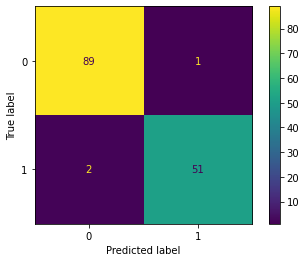

In [33]:
plot_confusion_matrix(grid, X_test, y_test)
plt.grid(False);

In [35]:
best_2 = grid_df[parameters].sort_values(by = ['rank_test_score']).head(140)
best_2

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
74,500,9,False,True,0.981176,1
72,500,9,True,True,0.981176,1
352,2000,9,True,True,0.981176,1
34,100,9,False,True,0.981176,1
192,2500,9,True,True,0.981176,1
...,...,...,...,...,...,...
1398,2500,10,False,True,0.978824,21
994,2500,9,False,True,0.978824,21
672,500,9,True,True,0.978824,21
956,2000,10,True,True,0.978824,21


In [36]:
best_2['param_pca__n_components'].value_counts()

9     70
10    70
Name: param_pca__n_components, dtype: int64

In [37]:
grid_df[parameters].sort_values(by = ['param_pca__n_components']).head(15)

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
0,100,1,True,True,0.908345,1801
161,2500,1,True,False,0.905964,1901
162,2500,1,False,True,0.908345,1801
163,2500,1,False,False,0.905964,1901
1203,100,1,False,False,0.905964,1901
1202,100,1,False,True,0.908345,1801
1201,100,1,True,False,0.905964,1901
760,2500,1,True,True,0.908345,1801
1922,2000,1,False,True,0.908345,1801
1923,2000,1,False,False,0.905964,1901
